# lineq_dc_circuit
+ [System of linear equations for DC circuit](https://neuron.eng.wayne.edu/auth/ece3040/lectures/lecture15.pdf)
+ [Applications of system of linear equations to electrical networks](https://home.csulb.edu/~jchang9/m247/m247_poster_R_Odisho_sp09.pdf)
+ [Solving systems of linear equations with Python's Numpy](https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/)

## questions

### part a (in-class)
1. Write 1st and 2nd Kirchhof laws
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ for following figure. <br>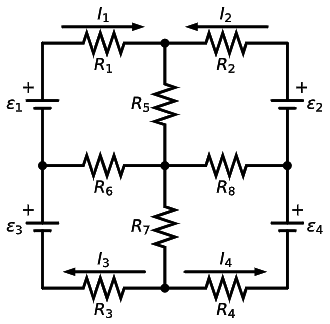
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix.
5. Write final matrix that represent values for $I_1$, $I_2$, $I_3$, and $I_4$, symbolically.

### part b (take-home)
1. Report image produced by executing following lines of code.
```python
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')
```
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ from produced figure.
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix and code representing the augmented matrix.
5. Find solutions for $I_1$, $I_2$, $I_3$, and $I_4$ using [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) for following values, where $R_i$ is in $\rm \Omega$ and $\varepsilon_i$ is in $\rm V$.

$R_1$ | $R_2$ | $R_3$ | $R_4$ | $R_5$ | $R_6$ | $R_7$ | $R_8$ | $\varepsilon_1$ | $\varepsilon_2$ | $\varepsilon_3$ | $\varepsilon_4$
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:
1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 12 | 15 | 16 | 19 

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell or in one Markdown cell.
+ There should be **at least five cells (Code cells + Markdown cells)**.
+ Existence of additional Markdown cells for explanation are optional.

**Adam Raihan Ramadhani (10219079)**

# 1

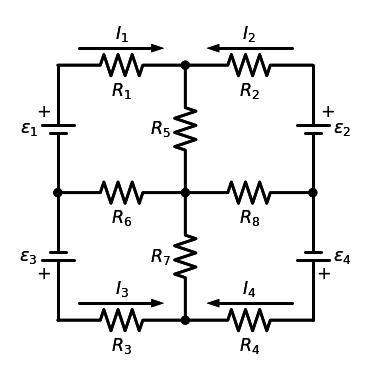

In [2]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')

# 2
$\varepsilon = \Sigma I R$  
$\varepsilon_1 = I_1R_1+(I_1+I_2)R_5+(I_1-I_3)R_6$  
$\varepsilon_2 = I_2R_2+(I_1+I_2)R_5+(I_2-I_4)R_8$  
$\varepsilon_3 = I_3R_3+(I_3+I_4)R_7+(I_3-I_1)R_6$  
$\varepsilon_4 = I_4R_4+(I_3+I_4)R_7+(I_4-I_2)R_8$  
Sehingga  
$I_1=\dfrac{\varepsilon_1}{R_1+R_5+R_6}+\dfrac{\varepsilon_2}{R_5}+\dfrac{\varepsilon_3}{-R_6}$  
$I_2=\dfrac{\varepsilon_1}{R_5}+\dfrac{\varepsilon_2}{R_2+R_5+R_8}+\dfrac{\varepsilon_4}{-R_8}$  
$I_3=\dfrac{\varepsilon_1}{-R_6}+\dfrac{\varepsilon_3}{R_3+R_7+R_6}+\dfrac{\varepsilon_4}{R_7}$  
$I_4=\dfrac{\varepsilon_2}{-R_8}+\dfrac{\varepsilon_3}{R_7}+\dfrac{\varepsilon_4}{R_4+R_7+R_8}$  

# 3
Matriks
$
\begin{bmatrix}
R_1+R_5+R_6 & R_5 & -R_6 & 0\\\\
R_5 & R_2+R_5+R_8 & 0 & -R_8\\\\
-R_6 & 0 & R_3+R_7+R_6 & R_7\\\\
0 & -R_8 & R_7 & R_4+R_7+R_8
\end{bmatrix}
\begin{bmatrix}
I_1\\\\
I_2\\\\
I_3\\\\
I_4\\\\
\end{bmatrix}
=
\begin{bmatrix}
\varepsilon_1\\\\
\varepsilon_2\\\\
\varepsilon_3\\\\
\varepsilon_4\\\\
\end{bmatrix}
$

# 4
Augmented matrix
$
\left[\begin{matrix}
R_1+R_5+R_6 & R_5 & -R_6 & 0\\\\
R_5 & R_2+R_5+R_8 & 0 & -R_8\\\\
-R_6 & 0 & R_3+R_7+R_6 & R_7\\\\
0 & -R_8 & R_7 & R_4+R_7+R_8
\end{matrix}\right|
\left.\begin{matrix}
\varepsilon_1\\\\
\varepsilon_2\\\\
\varepsilon_3\\\\
\varepsilon_4
\end{matrix}\right]
$


# 5

In [3]:
import numpy as np
R_1=1
R_2=2
R_3=3
R_4=4
R_5=5
R_6=6
R_7=7
R_8=8
E_1=12
E_2=15
E_3=16
E_4=19

R=np.array([[R_1+R_5+R_6, R_5, -R_6, 0]
           ,[R_5, R_2+R_5+R_8, 0, -R_8]
           ,[-R_6, 0, R_3+R_7+R_6, R_7]
           ,[0, -R_8, R_7, R_4+R_7+R_8]])
E=np.array([E_1, E_2, E_3, E_4])
I=np.linalg.solve(R,E)

print(I)

[0.69172791 1.5161108  0.64688148 1.40003769]
